**[Machine Learning Course Home Page](https://www.kaggle.com/learn/machine-learning)**

---


This exercise will test your ability to read a data file and understand statistics about the data.

In later exercises, you will apply techniques to filter the data, build a machine learning model, and iteratively improve your model.

The course examples use data from Melbourne. To ensure you can apply these techniques on your own, you will have to apply them to a new dataset (with house prices from Iowa).

The exercises use a "notebook" coding environment.  In case you are unfamiliar with notebooks, we have a [90-second intro video](https://www.youtube.com/watch?v=4C2qMnaIKL4).

# Exercises

Run the following cell to set up code-checking, which will verify your work as you go.

In [1]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex2 import *
print("Setup Complete")

Setup Complete


## Step 1: Loading Data
Read the Iowa data file into a Pandas DataFrame called `home_data`.

In [2]:
import pandas as pd

# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

# Fill in the line below to read the file into a variable home_data
home_data = pd.read_csv("../input/home-data-for-ml-course/train.csv")

# Call line below with no argument to check that you've loaded the data correctly
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [3]:
# Lines below will give you a hint or solution code
#step_1.hint()
#step_1.solution()

In [4]:
home_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Step 2: Review The Data
Use the command you learned to view summary statistics of the data. Then fill in variables to answer the following questions

In [6]:
# Print summary statistics in next line
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
unique = home_data[['Id', 'YearBuilt', 'YrSold']]
unique.describe()

,Id,YearBuilt,YrSold
count,1460.000000,1460.000000,1460.000000
mean,730.500000,1971.267808,2007.815753
std,421.610009,30.202904,1.328095
min,1.000000,1872.000000,2006.000000
25%,365.750000,1954.000000,2007.000000
50%,730.500000,1973.000000,2008.000000
75%,1095.250000,2000.000000,2009.000000
max,1460.000000,2010.000000,2010.000000


In [20]:
last_sold_yr = home_data['YrSold'].max()                     
last_sold_mo = home_data['MoSold'].max()
latest_built = home_data['YearBuilt'].max()
latest_remodal = home_data['YearRemodAdd'].max()
print(f"Last sold on {last_sold_mo}/{last_sold_yr}")
print(f"Latest build year is {latest_built}")
print(f"Latest remodal year is {latest_remodal}")

Last sold on 12/2010
Latest build year is 2010
Latest remodal year is 2010


In [8]:
home_data['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

- 25% between 1872-1954 (82 years)
- 25% between 1954-1973 (19 years)
- 25% between 1973-2000 (27 years)
- 25% of total houses were built between 2000-2010 (distributed among 10 years)

In [9]:
home_data.YrSold.describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: YrSold, dtype: float64

In [26]:
home_data['YearBuilt'].value_counts().sort_index(ascending=False).head()

2010     1
2009    18
2008    23
2007    49
2006    67
Name: YearBuilt, dtype: int64

In [27]:
home_data.groupby('YearBuilt').YearBuilt.value_counts().sort_values(ascending=False)

YearBuilt  YearBuilt
2006       2006         67
2005       2005         64
2004       2004         54
2007       2007         49
2003       2003         45
                        ..
1906       1906          1
1911       1911          1
1913       1913          1
1917       1917          1
1872       1872          1
Name: YearBuilt, Length: 112, dtype: int64

In [30]:
home_data.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [29]:
home_data.groupby('YrSold').YrSold.value_counts()

YrSold  YrSold
2006    2006      314
2007    2007      329
2008    2008      304
2009    2009      338
2010    2010      175
Name: YrSold, dtype: int64

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

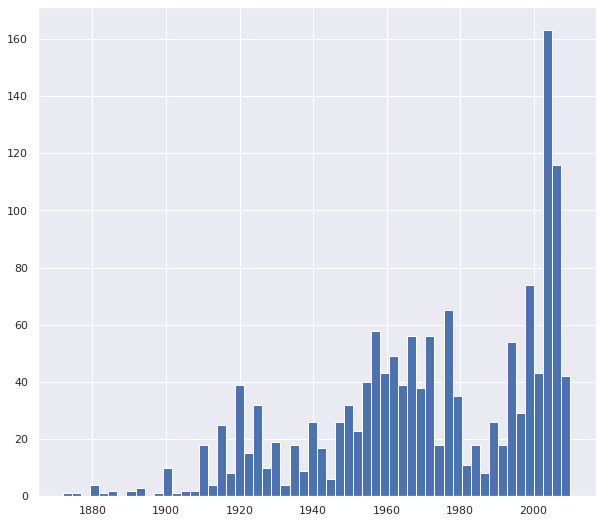

In [34]:
plt.figure(figsize=(10,9))
plt.hist(home_data['YearBuilt'],bins=56)
plt.show()

- As per the Histogram for the year built, we can analyse that there are no house data post 2010

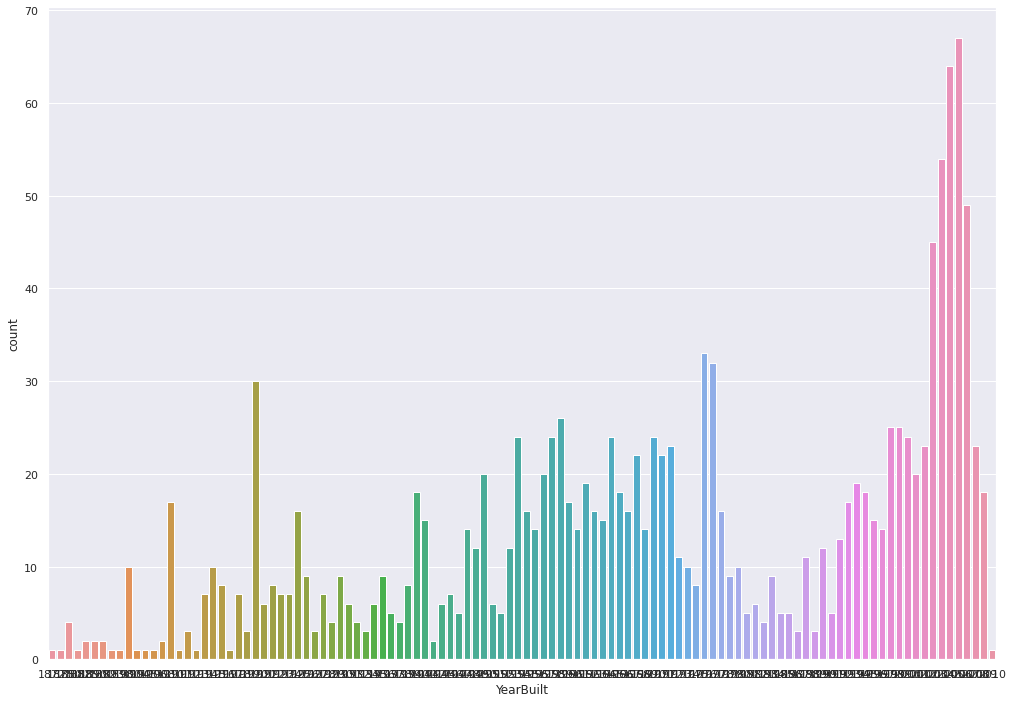

In [39]:
plt.figure(figsize=(17,12))
sns.countplot(home_data['YearBuilt'])

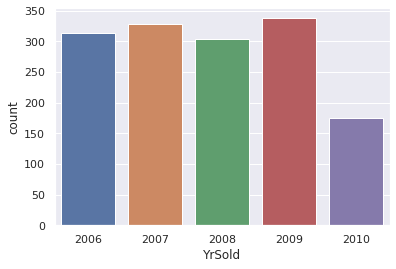

In [36]:
sns.countplot(home_data['YrSold'])

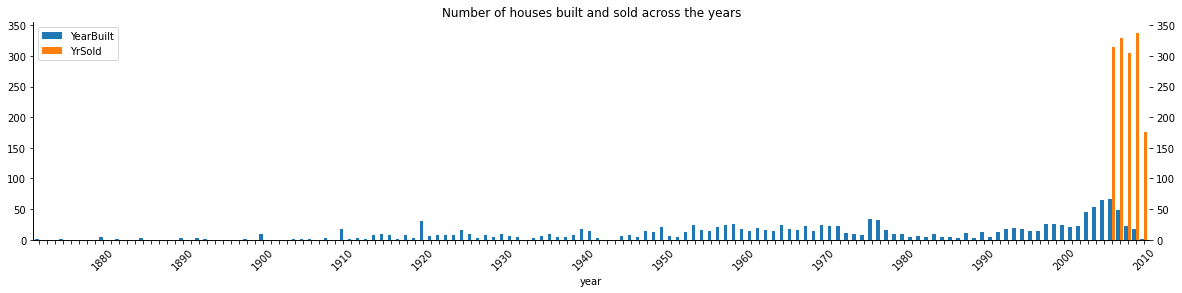

In [13]:
# first graph 
minYear = min( min(home_data['YearBuilt']), min(home_data['YrSold']))
maxYear = max( max(home_data['YearBuilt']), max(home_data['YrSold']))
years = range(minYear, maxYear+1)

df = pd.DataFrame({'year': years}, index=years)
df.index.name = 'year'

df['YearBuilt'] = home_data.groupby('YearBuilt').agg({'YearBuilt': 'count'})
df['YrSold'] = home_data.groupby('YrSold').agg({'YrSold': 'count'})
df = df.drop('year', axis=1)
df = df.fillna(0)

ax1 = df.plot(kind='bar', y=['YearBuilt', 'YrSold'], figsize=(20,4), width=0.9)
def format_x(id, pos=None):
    if(years[id] % 10 == 0):
        return str(years[id])
    else:
        return ''
plt.xticks(rotation=45)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(format_x))
ax1.set_title('Number of houses built and sold across the years')
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
for ax in [ax1, ax2]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.show()

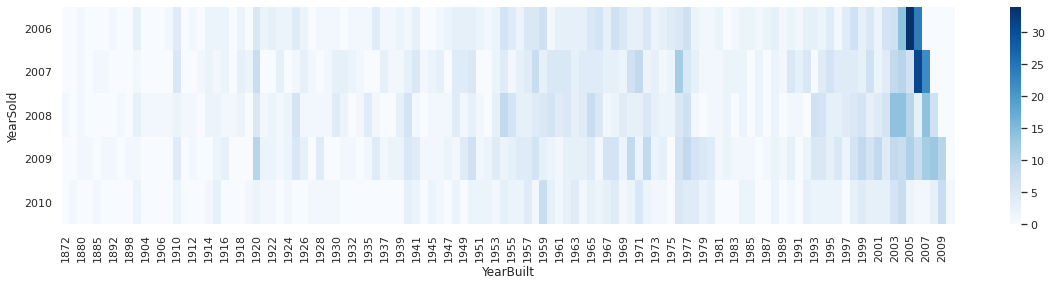

In [14]:
# second graph

import seaborn as sns; sns.set()

df = home_data.groupby(['YearBuilt', 'YrSold']).agg({'YearBuilt': 'count'})
df = df.unstack(level=1).fillna(0).T
df = df.droplevel(0)

fig, ax = plt.subplots(figsize=(20,4))  
sns.heatmap(df, cmap='Blues', ax=ax)
plt.ylabel('YearSold')
plt.yticks(rotation=0)
plt.show()

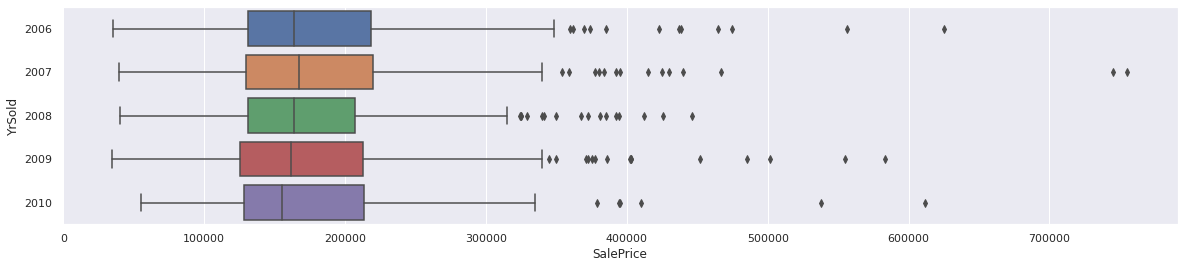

In [15]:
# third graph
df = home_data[['YrSold', 'SalePrice']]
fig, ax = plt.subplots(figsize=(20,4))  
sns.boxplot(y="YrSold", x="SalePrice", data=df, orient='h', ax=ax)
plt.show()

In [16]:
Avg_price_by_year_month = pd.DataFrame(home_data.groupby(["YrSold","MoSold"]).SalePrice.mean().round())
Cnt_price_by_year_month = pd.DataFrame(home_data.groupby(["YrSold","MoSold"]).SalePrice.count().round())

price_table = Avg_price_by_year_month.merge(Cnt_price_by_year_month,on = ["YrSold","MoSold"])
price_table = price_table.rename(index = str, columns = ({"SalePrice_x": "Avg_SalePrice", "SalePrice_y": "SaleCount" }))
price_table

Avg_SalePrice  SaleCount
YrSold MoSold                          
2006   1            201090.0         10
       2            194322.0          9
       3            184982.0         25
       4            174313.0         27
       5            158928.0         38
       6            172283.0         48
       7            183211.0         67
       8            196240.0         23
       9            223769.0         15
       10           172357.0         24
       11           213285.0         16
       12           185545.0         12
2007   1            183235.0         13
       2            176302.0          8
       3            176568.0         23
       4            170773.0         23
       5            169874.0         43
       6            179726.0         59
       7            195397.0         51
       8            183941.0         40
       9            195534.0         11
       10           215429.0         16
       11           197709.0         24
       12           214414.0         18
2008   1            178505.0         13
       2            159370.0         10
       3            178505.0         18
       4            159293.0         26
       5            188334.0         38
       6            169731.0         51
       7            174563.0         49
       8            196077.0         29
       9            169626.0         17
       10           166691.0         22
       11           210981.0         17
       12           175600.0         14
2009   1            189736.0         12
       2            187450.0         10
       3            171547.0         19
       4            181681.0         26
       5            164483.0         37
       6            183261.0         59
       7            197984.0         61
       8            165671.0         30
       9            196849.0         20
       10           175207.0         27
       11           156382.0         22
       12           164015.0         15
2010   1            163853.0         10
       2            174823.0         15
       3            203181.0         21
       4            171344.0         39
       5            178422.0         48
       6            181640.0         36
       7            121750.0          6

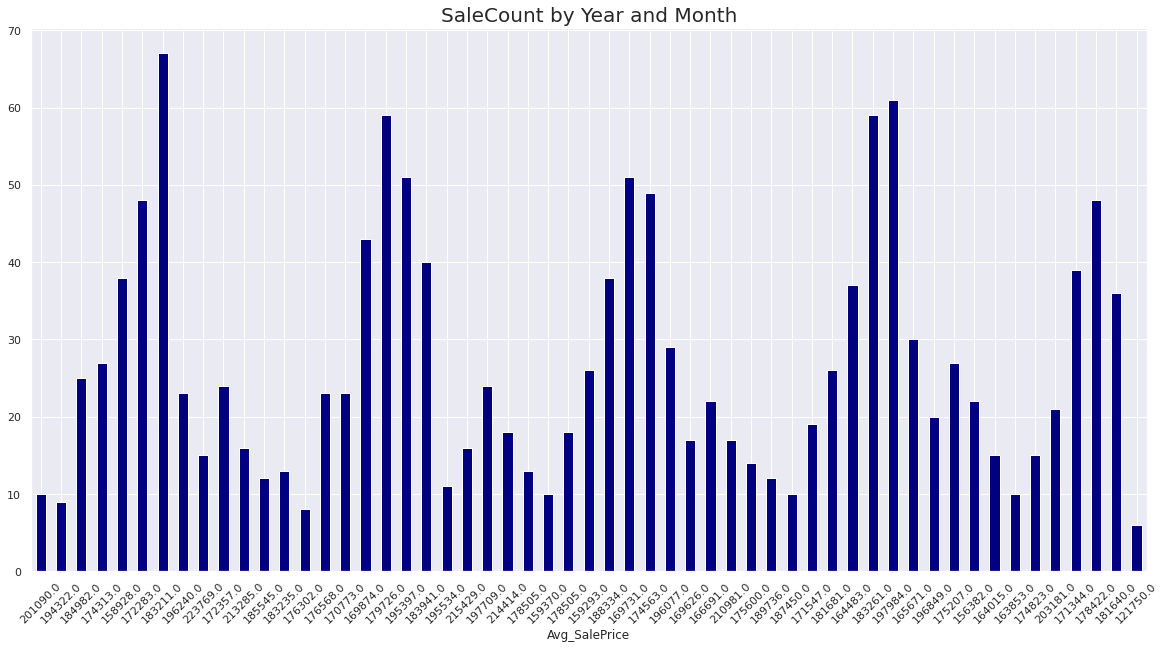

In [17]:
price_table.plot.bar(x="Avg_SalePrice",y="SaleCount",legend=None, figsize=(20, 10), color='navy')
plt.xticks(rotation=45)
plt.title("SaleCount by Year and Month", fontsize = 20)
plt.show()

In [18]:
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = round(home_data['LotArea'].mean())

# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = (2020-home_data['YearBuilt'].max())

# Checks your answers
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [19]:
#step_2.hint()
#step_2.solution()

## Think About Your Data

The newest house in your data isn't that new.  A few potential explanations for this:
1. They haven't built new houses where this data was collected.
1. The data was collected a long time ago. Houses built after the data publication wouldn't show up.

If the reason is explanation #1 above, does that affect your trust in the model you build with this data? What about if it is reason #2?

How could you dig into the data to see which explanation is more plausible?

Check out this **[discussion thread](https://www.kaggle.com/learn-forum/60581)** to see what others think or to add your ideas.

# Keep Going

You are ready for **[Your First Machine Learning Model](https://www.kaggle.com/dansbecker/your-first-machine-learning-model).**


---
**[Machine Learning Course Home Page](https://www.kaggle.com/learn/machine-learning)**

